# Introduction

This notebook demonstrates how to use pymatgen to quickly obtain data from the Materials Project, and perform some basic structure manipulations and analysis.

# Getting the structure for Li$_4$GeS$_4$

## Option 1 - Read a CIF downloaded from ICSD

In [3]:
from pymatgen import Structure

Li4GeS4 = Structure.from_file("ICSD_95649.cif")
print(Li4GeS4)

Full Formula (Li16 Ge4 S16)
Reduced Formula: Li4GeS4
abc   :  14.034000   7.754800   6.150230
angles:  90.000000  90.000000  90.000000
Sites (36)
  #  SP          a       b       c
---  ----  -------  ------  ------
  0  Li+   0.9127   0.75    0.1315
  1  Li+   0.4127   0.75    0.3685
  2  Li+   0.0873   0.25    0.8685
  3  Li+   0.5873   0.25    0.6315
  4  Li+   0.6768   0.9973  0.1997
  5  Li+   0.1768   0.5027  0.3003
  6  Li+   0.3232   0.4973  0.8003
  7  Li+   0.8232   0.0027  0.6997
  8  Li+   0.3232   0.0027  0.8003
  9  Li+   0.8232   0.4973  0.6997
 10  Li+   0.6768   0.5027  0.1997
 11  Li+   0.1768   0.9973  0.3003
 12  Li+   0.5      0       0
 13  Li+   0        0.5     0.5
 14  Li+   0.5      0.5     0
 15  Li+   0        0       0.5
 16  Ge4+  0.91078  0.25    0.1494
 17  Ge4+  0.41078  0.25    0.3506
 18  Ge4+  0.08922  0.75    0.8506
 19  Ge4+  0.58922  0.75    0.6494
 20  S2-   0.8428   0.0149  0.2758
 21  S2-   0.3428   0.4851  0.2242
 22  S2-   0.1572   0.5149  0.

## Option 2 - Query from Materials Project using API

In [4]:
from pymatgen.ext.matproj import MPRester

mpr = MPRester()  # If this gives you an error, please do mpr = MPRester("your API key") instead.

# Here, we use the high-level interface to the Materials Project (MPRester) to get all entries from 
# the Materials Project with formula Li4GeS4.

entries = mpr.get_entries("Li4GeS4", inc_structure=True)
print(len(entries))
Li4GeS4 = entries[0].structure
print(Li4GeS4)

1
Full Formula (Li16 Ge4 S16)
Reduced Formula: Li4GeS4
abc   :   6.150230   7.754800  14.034000
angles:  90.000000  90.000000  90.000000
Sites (36)
  #  SP         a       b        c
---  ----  ------  ------  -------
  0  Li    0.6315  0.25    0.5873
  1  Li    0.1315  0.75    0.9127
  2  Li    0.3685  0.75    0.4127
  3  Li    0.8685  0.25    0.0873
  4  Li    0.6997  0.0027  0.8232
  5  Li    0.1997  0.9973  0.6768
  6  Li    0.3003  0.5027  0.1768
  7  Li    0.8003  0.4973  0.3232
  8  Li    0.3003  0.9973  0.1768
  9  Li    0.8003  0.0027  0.3232
 10  Li    0.6997  0.4973  0.8232
 11  Li    0.1997  0.5027  0.6768
 12  Li    0.5     0       0
 13  Li    0       0       0.5
 14  Li    0.5     0.5     0
 15  Li    0       0.5     0.5
 16  Ge    0.6494  0.75    0.58922
 17  Ge    0.1494  0.25    0.91078
 18  Ge    0.3506  0.25    0.41078
 19  Ge    0.8506  0.75    0.08922
 20  S     0.7758  0.9851  0.6572
 21  S     0.2758  0.0149  0.8428
 22  S     0.2242  0.4851  0.3428
 23  S     0

In [8]:
for e in mpr.get_entries("CsCl", inc_structure=True):
    print(e.structure)
    print(e.structure.get_space_group_info())

Full Formula (Cs1 Cl1)
Reduced Formula: CsCl
abc   :   4.110000   4.110000   4.110000
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Cl    0.5  0.5  0.5
  1  Cs    0    0    0
('Pm-3m', 221)
Full Formula (Cs1 Cl1)
Reduced Formula: CsCl
abc   :   4.895300   4.895300   4.895300
angles:  60.000001  59.999999  60.000005
Sites (2)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Cs    0    0    0
  1  Cl    0.5  0.5  0.5
('Fm-3m', 225)


# Making Li$_4$SnS$_4$ from Li$_4$GeS$_4$

In [3]:
Li4SnS4 = Li4GeS4.copy()
Li4SnS4["Ge"] = "Sn"
print(Li4SnS4)

# Generates a crystallographic information format file that can be viewed in most 
# crystal visualization software.
Li4SnS4.to(filename="Li4SnS4.cif")  

Full Formula (Li16 Sn4 S16)
Reduced Formula: Li4SnS4
abc   :   6.150230   7.754800  14.034000
angles:  90.000000  90.000000  90.000000
Sites (36)
  #  SP         a       b        c
---  ----  ------  ------  -------
  0  Li    0.6315  0.25    0.5873
  1  Li    0.1315  0.75    0.9127
  2  Li    0.3685  0.75    0.4127
  3  Li    0.8685  0.25    0.0873
  4  Li    0.6997  0.0027  0.8232
  5  Li    0.1997  0.9973  0.6768
  6  Li    0.3003  0.5027  0.1768
  7  Li    0.8003  0.4973  0.3232
  8  Li    0.3003  0.9973  0.1768
  9  Li    0.8003  0.0027  0.3232
 10  Li    0.6997  0.4973  0.8232
 11  Li    0.1997  0.5027  0.6768
 12  Li    0.5     0       0
 13  Li    0       0       0.5
 14  Li    0.5     0.5     0
 15  Li    0       0.5     0.5
 16  Sn    0.6494  0.75    0.58922
 17  Sn    0.1494  0.25    0.91078
 18  Sn    0.3506  0.25    0.41078
 19  Sn    0.8506  0.75    0.08922
 20  S     0.7758  0.9851  0.6572
 21  S     0.2758  0.0149  0.8428
 22  S     0.2242  0.4851  0.3428
 23  S     0.7

# Generating input files for calculations

Pymatgen supports many computational chemistry codes. The Materials Project uses primarily VASP as the quantum mechanical code. In pymatgen, we have defined robust rules for generating VASP input files with parameters used by the Materials Project, which has been tested over a broad range of chemistries.

In [4]:
from pymatgen.io.vasp.sets import MPRelaxSet

input_set = MPRelaxSet(Li4SnS4)
print(input_set.incar)
print(input_set.kpoints)
# print(input_set.poscar)
# print(input_set.potcar)

# Do not run the line below. This is to show that you can write all the input files to a directory.
# input_set.write_input("Li4SnS4")

ALGO = Fast
EDIFF = 0.0018000000000000002
ENCUT = 520
IBRION = 2
ICHARG = 1
ISIF = 3
ISMEAR = -5
ISPIN = 2
LORBIT = 11
LREAL = Auto
LWAVE = False
MAGMOM = 36*0.6
NELM = 100
NSW = 99
PREC = Accurate
SIGMA = 0.05

pymatgen 4.7.6+ generated KPOINTS with grid density = 854 / atom
0
Gamma
4 3 1



# Retreiving the results of a calculation

Here, we have provided the output file from the VASP calculation in Li4SnS4/vasprun.xml.

In [5]:
from pymatgen.io.vasp import Vasprun

vasprun = Vasprun("Li4SnS4/vasprun.xml")
print(vasprun.final_structure)
print("Final energy = %.3f" % vasprun.final_energy)
Li4SnS4_entry = vasprun.get_computed_entry()

Full Formula (Li16 Sn4 S16)
Reduced Formula: Li4SnS4
abc   :   6.342122   7.988423  14.334782
angles:  90.000000  90.000000  90.000000
Sites (36)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  Li    0.631118  0.25      0.58791
  1  Li    0.131118  0.75      0.91209
  2  Li    0.368882  0.75      0.41209
  3  Li    0.868882  0.25      0.08791
  4  Li    0.692196  0.001655  0.823401
  5  Li    0.192196  0.998345  0.676599
  6  Li    0.307804  0.501655  0.176599
  7  Li    0.807804  0.498345  0.323401
  8  Li    0.307804  0.998345  0.176599
  9  Li    0.807804  0.001655  0.323401
 10  Li    0.692196  0.498345  0.823401
 11  Li    0.192196  0.501655  0.676599
 12  Li    0.5       0         0
 13  Li    0         0         0.5
 14  Li    0.5       0.5       0
 15  Li    0         0.5       0.5
 16  Sn    0.64781   0.75      0.592395
 17  Sn    0.14781   0.25      0.907605
 18  Sn    0.35219   0.25      0.407605
 19  Sn    0.85219   0.75      0.092395
 2

# Analysis

We will now perform a few types of analysis using the output from our calculation of Li4SnS4.

## Phase stability

To calculate phase stability, we need to get the energies of all materials in the Li-Sn-S system. Typically, this will require many computations all Li, Sn, S, Li-Sn, Li-S, Sn-S and Li-Sn-S phases. Here, we will utilize the existing data within the Materials Project to quickly perform this analysis.

In [6]:
# Get all the entries in the chemical system
Li_Sn_S_entries = mpr.get_entries_in_chemsys(["Li", "Sn", "S"])

Pymatgen also defines correction schemes to adjust energies to correct for common errors in DFT, for example, the binding energy of certain molecules such as O2 and S8. These are called "compatibility" schemes, which makes sure that all entries have been calculated using the same set of pseudopotentials and relatively consistent parameters.

In [7]:
from pymatgen.entries.compatibility import MaterialsProjectCompatibility

compat = MaterialsProjectCompatibility()
all_entries = compat.process_entries(Li_Sn_S_entries + [Li4SnS4_entry])

We will then use pymatgen's powerful phase_diagram module to plot the phase diagram.

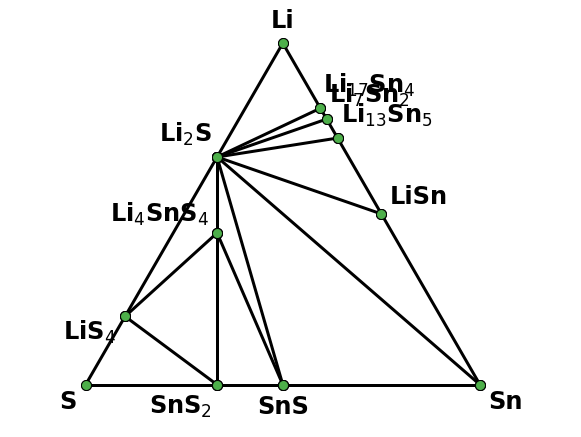

In [8]:
# This line allows the plots to show up within the notebook
%matplotlib inline  
from pymatgen.analysis.phase_diagram import PhaseDiagram, PDPlotter

pd = PhaseDiagram(all_entries)
plotter = PDPlotter(pd)
plotter.show()

## Electronic structure

Pymatgen also provides functionality to plot other outputs of the calculations, for example, electronic structure output. The Vasprun object already parses the complete output, including density of states (DOS). Note that the default parameters for relaxation calculations are not optimized for obtaining good DOS or bandstructures. So the following should just be seen as a demonstration of capability, and is not the result of a quality calculation.

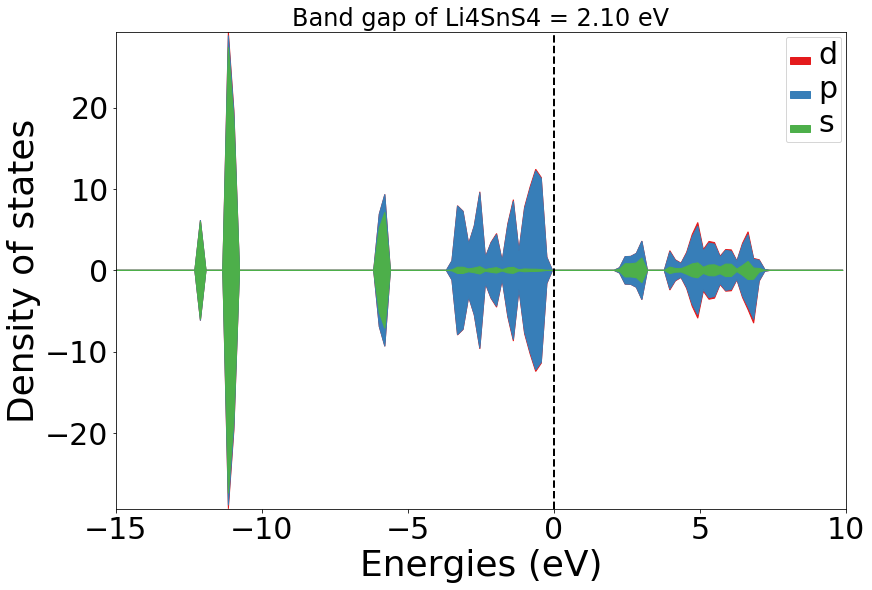

In [9]:
cdos = vasprun.complete_dos

from pymatgen.electronic_structure.plotter import DosPlotter

dos_plotter = DosPlotter(stack=True)
dos_plotter.add_dos_dict(cdos.get_spd_dos())
plt = dos_plotter.get_plot()
plt.xlim((-15, 10))  # Limit the range of energies for easier visualization.
text = plt.title("Band gap of Li4SnS4 = %.2f eV" % cdos.get_gap(), fontsize=24)

# Conclusion

This concludes our introductory session into the capabilities of the Python Materials Genomics materials analysis library. It should be noted that this barely scratches the surface of pymatgen's capabilities. More information can be found at http://www.pymatgen.org.